PART A: RESAMPLING BASED CONFIDENCE INTERVALS

Exercise A:1 - Percentile Bootstrap Intervals for the mean and the standard deviation

a)

In [24]:
import numpy as np
import statistics

mu = 5
sigma = 2.7
X_20 = np.random.normal(loc=mu, scale=sigma, size=20)
print(f'Sample values: {X_20}')

Sample values: [ 6.20149862 10.84026558  2.14720719  7.11653886  8.41718247 10.70260651
  6.42279398  6.06379579  3.00382083  2.66045729  5.97916929  4.77516467
  2.45873292  6.98975127  5.19440003  7.26035512  2.27884358  2.00534916
  5.36688742  1.19149938]


b)

In [25]:
print(f'Sample mean: {statistics.mean(X_20)}')
print(f'Sample standard deviation: {statistics.stdev(X_20)}')

Sample mean: 5.353815997998548
Sample standard deviation: 2.8103491043665123


c)

In [26]:
!pip install scipy --upgrade
import scipy
print(scipy.__version__) #reset execution environment to get the upgraded version

1.7.3


In [27]:
from scipy.stats import bootstrap
bootstrap_20 = bootstrap((X_20,), np.mean, confidence_level=0.95)
low_mean_20, high_mean_20 = bootstrap_20.confidence_interval
print(f'2,5% percentile of X_20: {low_mean_20}')
print(f'97,5% percentile of X_20: {high_mean_20}')

2,5% percentile of X_20: 4.216911986634578
97,5% percentile of X_20: 6.649501629149555


d)

In [28]:
X_2000 = np.random.normal(loc=5, scale=2.7, size=2000)
print(f'Sample mean: {statistics.mean(X_2000)}')
print(f'Sample standard deviation: {statistics.stdev(X_2000)}')

bootstrap_2000 = bootstrap((X_2000,), np.mean, confidence_level=0.95)
low_mean_2000, high_mean_2000 = bootstrap_2000.confidence_interval
print(f'2,5% percentile of X_2000: {low_mean_2000}')
print(f'97,5% percentile of X_2000: {high_mean_2000}')

Sample mean: 5.025735171428138
Sample standard deviation: 2.758543646792621
2,5% percentile of X_2000: 4.9013614098112015
97,5% percentile of X_2000: 5.145681073528347


In this case we have a bigger sample so the there is more certainty in the results. Therefore, the confidence interval is narrower.

e)

In [29]:
#bootstrap for 20 data points
bootstrap_20 = bootstrap((X_20,), np.std, confidence_level=0.95)
low_std_20, high_std_20 = bootstrap_20.confidence_interval
print(f'2,5% percentile of X_20: {low_std_20}')
print(f'97,5% percentile of X_20: {high_std_20}')

#bootstrap for 2000 data points
bootstrap_2000 = bootstrap((X_2000,), np.std, confidence_level=0.95)
low_std_2000, high_std_2000 = bootstrap_2000.confidence_interval
print(f'2,5% percentile of X_2000: {low_std_2000}')
print(f'97,5% percentile of X_2000: {high_std_2000}')

2,5% percentile of X_20: 2.1287277520143437
97,5% percentile of X_20: 3.5192236462735407
2,5% percentile of X_2000: 2.674530652350718
97,5% percentile of X_2000: 2.850669163225183


f)

In [30]:
print(f'Is mean inside confidence interval for bootstrap 20? {low_mean_20<mu and mu<high_mean_20}')
print(f'Is standard deviation inside confidence interval for bootstrap 20? {low_std_20<sigma and sigma<high_std_20}')

print(f'Is mean inside confidence interval for bootstrap 2000? {low_mean_2000<mu and mu<high_mean_2000}')
print(f'Is standard deviation inside confidence interval for bootstrap 2000? {low_std_2000<sigma and sigma<high_std_2000}')

Is mean inside confidence interval for bootstrap 20? True
Is standard deviation inside confidence interval for bootstrap 20? True
Is mean inside confidence interval for bootstrap 2000? True
Is standard deviation inside confidence interval for bootstrap 2000? True


We should get True for each interval 95% of the times that we calculate the sample and its bootstrap. 

Exercise A:2 - Percentile Bootstrap Intervals for Correlations

a)

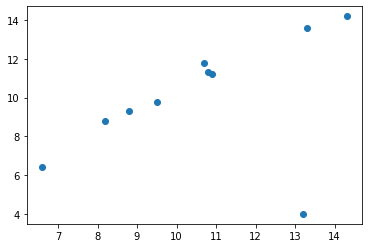

In [31]:
import matplotlib.pyplot as plt
X = [13.2, 8.2, 10.9, 14.3, 10.7, 6.6, 9.5, 10.8, 8.8, 13.3]
Y = [4.0, 8.8, 11.2, 14.2, 11.8, 6.4, 9.8, 11.3, 9.3, 13.6]
plt.scatter(X, Y)
plt.show()

There seems to be a correlation between X and Y. All data seems to follow a linear trend with the exception of one point which is an outlier.

b)

In [32]:
from scipy.stats import pearsonr
corr = pearsonr(X, Y)
print(f'Pearsons correlation coefficent: {corr[0]}')

Pearsons correlation coefficent: 0.42366691998681266


This coefficient indicates that there is a very small correlation between two variables. That might be due to the small amount of data. The outlier has a strong effect on the correlation coefficient.

c)

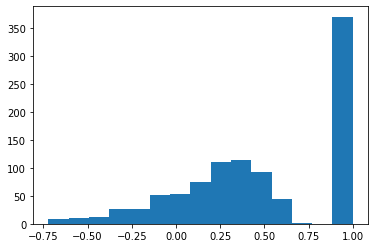

95% confidence interval: [-0.4373967958144981, 0.9966390244102837]
Is zero inside the interval? True


In [33]:
n_iter = 1000
corr_resample = []
for i in range(n_iter):
  X_resample = np.random.choice(X, size=10, p=None, replace=True)
  Y_resample = []
  for x in X_resample:
    ind = X.index(x)
    Y_resample.append(Y[ind])
  corr = pearsonr(X_resample, Y_resample)
  corr_resample.append(corr[0])

plt.hist(corr_resample, bins=15)
plt.show()

percentiles = np.percentile(corr_resample, [2.5, 97.5])
print(f'95% confidence interval: [{percentiles[0]}, {percentiles[1]}]')
print(f'Is zero inside the interval? {percentiles[0]<0 and 0<percentiles[1]}')

There is a normal distribution around value 0,42, which is the correlation of the original values of X and Y. Additionally, there are a lot of instances close to 1, in these cases the outlier is not taken in the resample.

Exercise A:3 - Bootstrap confidence interval for an unknown fraction

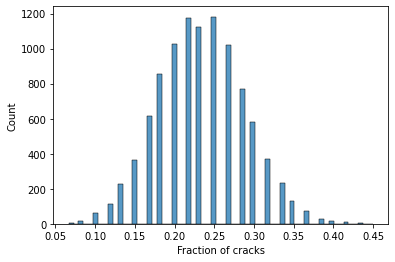

95% confidence interval: [0.13333333333333333, 0.35]


In [34]:
np_values = np.asarray(['Red', 'White'])
np_counts = np.asarray([14, 46])
np_urn = np.repeat(np_values, np_counts)

n_iter = int(1e4)
proportions = []
for i in range(n_iter):
  np_draw_with_replacement = list(np.random.choice(np_urn, size=60, p=None, replace=True))
  proportions.append(np_draw_with_replacement.count('Red')/len(np_draw_with_replacement))

import seaborn as sb
fig = sb.histplot(data=proportions)
plt.xlabel('Fraction of cracks')
plt.ylabel('Count')
plt.show()

percentiles = np.percentile(proportions, [2.5, 97.5])
print(f'95% confidence interval: [{percentiles[0]}, {percentiles[1]}]')

Exercise A:4 - Bootstrap confidence interval for an unknown fraction (classifier performance)

a)

In [40]:
np_values = np.asarray(['Error', 'Correct'])
np_counts = np.asarray([4, 16])
np_urn = np.repeat(np_values, np_counts)

proportions = []

n_iter = 1000
for i in range(n_iter):
  np_draw_with_replacement = list(np.random.choice(np_urn, size=20, p=None, replace=True))
  proportions.append(np_draw_with_replacement.count('Error')/len(np_draw_with_replacement))

percentiles = np.percentile(proportions, [2.5, 97.5])
print(f'95% confidence interval: [{percentiles[0]}, {percentiles[1]}]')

95% confidence interval: [0.05, 0.4]


Exercise A:5 - Bootstrap confidence interval for an unknown fraction (robot success rate)

a)

In [36]:
np_values = np.asarray(['Success', 'Failure'])
np_counts = np.asarray([89, 7])
np_urn = np.repeat(np_values, np_counts)

n_iter = 1000
success_rates = []
for i in range(n_iter):
  np_draw_with_replacement = list(np.random.choice(np_urn, size=96, p=None, replace=True))
  success_rates.append(np_draw_with_replacement.count('Success')/len(np_draw_with_replacement))

percentiles = np.percentile(success_rates, [2.5, 97.5])
print(f'95% confidence interval: [{percentiles[0]}, {percentiles[1]}]')

95% confidence interval: [0.875, 0.96875]


b)

In [37]:
np_values = np.asarray(['Success', 'Failure'])
np_counts = np.asarray([357, 27])
np_urn = np.repeat(np_values, np_counts)

n_iter = 1000
success_rates = []
for i in range(n_iter):
  np_draw_with_replacement = list(np.random.choice(np_urn, size=384, p=None, replace=True))
  success_rates.append(np_draw_with_replacement.count('Success')/len(np_draw_with_replacement))

percentiles = np.percentile(success_rates, [2.5, 97.5])
print(f'95% confidence interval: [{percentiles[0]}, {percentiles[1]}]')

95% confidence interval: [0.9036458333333333, 0.9557291666666666]


c)

In [38]:
np_values = np.asarray(['Success', 'Failure'])
np_counts = np.asarray([1428, 108])
np_urn = np.repeat(np_values, np_counts)

n_iter = 1000
success_rates = []
for i in range(n_iter):
  np_draw_with_replacement = list(np.random.choice(np_urn, size=1536, p=None, replace=True))
  success_rates.append(np_draw_with_replacement.count('Success')/len(np_draw_with_replacement))

percentiles = np.percentile(success_rates, [2.5, 97.5])
print(f'95% confidence interval: [{percentiles[0]}, {percentiles[1]}]')

95% confidence interval: [0.9173177083333334, 0.9420572916666666]


d) The standard error decreases as the sample size increases. There is less fluctuation between sample statistics when the sample size is bigger.
